In [ ]:
# Column of focus: u_actual_subcategory
# Want to evaluate as a count rather than against duration

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd

# COMPANY A - EDA

In [3]:
# COMPANY A
# Read in data:

a_data = pd.read_csv('/content/gdrive/Shared drives/IST 718 Project/a_cleaned.csv')
a_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration
0,0,0,0,I-ACM-SD L1-India,INC1499259,Cancelled,P4,user need to install jet stream viewer,NaN,10-27-2020 13:29:00 - Rajat Kumar (Additional ...,NaN,NaN,belfast,2020-10-27 12:50:00,2020-10-27 13:29:00,False,2337,2337,1,1,Rajat Kumar,NaN,Chat,NaN,UNKNOWN,NaN,Incident,2020-10-27 13:29:00,7.0,2,10/27/2020 13:29,2020-10-27 12:50:00,False,10-27-2020 13:29:00 - rajat kumar (additional ...,NaN,los angeles,UNKNOWN,Not Yet Requested,belfast,3 - Low,False,NaN,united kingdom,GB-GNGBP681-0002/BLDG,county antrim,europe(emea),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 00:39:00,0:38:57,0:38:57
1,3,3,3,I-ACM-CTS-India,INC1498224,Cancelled,P4,need assistance turning on bitlocker,name:sanjay kumar\r\nphone:566539297\r\nemail ...,10-27-2020 12:22:04 - Kaveri S (Additional com...,10-27-2020 12:21:54 - Kaveri S (Work notes)\nm...,NaN,"riyadh, SA",2020-10-27 00:29:00,2020-10-27 12:22:00,False,1324,42739,1,12,Kaveri S,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 12:22:00,9.0,2,10/27/2020 0:33,2020-10-27 00:29:00,False,10-27-2020 12:22:04 - kaveri s (additional com...,NaN,los angeles,UNKNOWN,Not Yet Requested,riyadh,3 - Low,False,NaN,saudi arabia,NaN,NaN,middle east (emea),security,bitlocker - break/fix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 11:53:00,11:52:19,0:22:04
2,4,4,4,I-ACM-SD Self Serv,INC1498051,Cancelled,P4,unable to obtain autocad license at home,description: i am trying to obtain a license ...,10-27-2020 02:58:38 - Sakshi Srivastava (Addit...,NaN,NaN,perth,2020-10-26 20:12:00,2020-10-27 02:58:00,False,0,24359,0,2,Sakshi Srivastava,NaN,Self-service,1.0,UNKNOWN,NaN,Incident,2020-10-27 02:58:00,9.0,3,10/26/2020 20:30,2020-10-26 20:12:00,False,10-27-2020 02:58:38 - sakshi srivastava (addit...,NaN,los angeles,UNKNOWN,Not Yet Requested,perth,3 - Low,False,NaN,australia,NaN,western australia,australia new zealand (apac),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 06:46:00,6:45:59,0:00:00
3,6,6,6,I-ACM-CTS-India,INC1497739,Cancelled,P4,user not able to login remotely / ritm0955755,ritm0955755 - user did not receive any email \...,10-26-2020 14:45:06 - Isha Arora (Additional c...,10-26-2020 14:44:54 - Isha Arora (Work notes)\...,NaN,cacgy01 - calgary - 240-6025 11 street se,2020-10-26 14:44:00,2020-10-26 14:45:00,False,4216,4216,0,1,Sanchaita Biswas,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-26 14:45:00,9.0,2,10/26/2020 14:45,2020-10-26 13:34:00,False,10-26-2020 14:45:06 - isha arora (additional c...,NaN,los angeles,UNKNOWN,Not Yet Requested,calgary,3 - Low,False,NaN,canada,CA-GNCAP691-0240/BLDG,ab,midwest(amer),workstation/ computer - software,windows 10,NaN,NaN,False,False,NaN,NaN,NaN,0 days 01:11:00,1:10:16,1:10:16
4,8,9,9,I-ACM-SD L1-India,INC1497518,Cancelled,P4,asta powerproject licence has expired/not work...,NaN,10-26-2020 11:09:09 - Manohar Oberoi (Addition...,NaN,NaN,cambridge,2020-10-26 11:09:00,2020-10-26 11:09:00,False,0,57,0,1,Manohar Oberoi,NaN,Chat,9.0,UNKNOWN,NaN,Incident,2020-10-26 11:09:00,9.0,2,10/26/2020 11:09,2020-10-26 11:08:00,False,10-26-2020 11:09:09 - manohar oberoi (addition...,NaN,los angeles,UNKNOWN,Not Yet Requested,cambridge,3 - Low,False,NaN,uk,NaN,NaN,NaN,software,software br

In [4]:
# Import packages for analysis
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
a_data = a_data.dropna(axis=0, subset=['u_actual_subcategory'])
# a_data.isnull().sum()
a_data.head()
#print(a_data.info())

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration
0,0,0,0,I-ACM-SD L1-India,INC1499259,Cancelled,P4,user need to install jet stream viewer,NaN,10-27-2020 13:29:00 - Rajat Kumar (Additional ...,NaN,NaN,belfast,2020-10-27 12:50:00,2020-10-27 13:29:00,False,2337,2337,1,1,Rajat Kumar,NaN,Chat,NaN,UNKNOWN,NaN,Incident,2020-10-27 13:29:00,7.0,2,10/27/2020 13:29,2020-10-27 12:50:00,False,10-27-2020 13:29:00 - rajat kumar (additional ...,NaN,los angeles,UNKNOWN,Not Yet Requested,belfast,3 - Low,False,NaN,united kingdom,GB-GNGBP681-0002/BLDG,county antrim,europe(emea),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 00:39:00,0:38:57,0:38:57
1,3,3,3,I-ACM-CTS-India,INC1498224,Cancelled,P4,need assistance turning on bitlocker,name:sanjay kumar\r\nphone:566539297\r\nemail ...,10-27-2020 12:22:04 - Kaveri S (Additional com...,10-27-2020 12:21:54 - Kaveri S (Work notes)\nm...,NaN,"riyadh, SA",2020-10-27 00:29:00,2020-10-27 12:22:00,False,1324,42739,1,12,Kaveri S,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 12:22:00,9.0,2,10/27/2020 0:33,2020-10-27 00:29:00,False,10-27-2020 12:22:04 - kaveri s (additional com...,NaN,los angeles,UNKNOWN,Not Yet Requested,riyadh,3 - Low,False,NaN,saudi arabia,NaN,NaN,middle east (emea),security,bitlocker - break/fix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 11:53:00,11:52:19,0:22:04
2,4,4,4,I-ACM-SD Self Serv,INC1498051,Cancelled,P4,unable to obtain autocad license at home,description: i am trying to obtain a license ...,10-27-2020 02:58:38 - Sakshi Srivastava (Addit...,NaN,NaN,perth,2020-10-26 20:12:00,2020-10-27 02:58:00,False,0,24359,0,2,Sakshi Srivastava,NaN,Self-service,1.0,UNKNOWN,NaN,Incident,2020-10-27 02:58:00,9.0,3,10/26/2020 20:30,2020-10-26 20:12:00,False,10-27-2020 02:58:38 - sakshi srivastava (addit...,NaN,los angeles,UNKNOWN,Not Yet Requested,perth,3 - Low,False,NaN,australia,NaN,western australia,australia new zealand (apac),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 06:46:00,6:45:59,0:00:00
3,6,6,6,I-ACM-CTS-India,INC1497739,Cancelled,P4,user not able to login remotely / ritm0955755,ritm0955755 - user did not receive any email \...,10-26-2020 14:45:06 - Isha Arora (Additional c...,10-26-2020 14:44:54 - Isha Arora (Work notes)\...,NaN,cacgy01 - calgary - 240-6025 11 street se,2020-10-26 14:44:00,2020-10-26 14:45:00,False,4216,4216,0,1,Sanchaita Biswas,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-26 14:45:00,9.0,2,10/26/2020 14:45,2020-10-26 13:34:00,False,10-26-2020 14:45:06 - isha arora (additional c...,NaN,los angeles,UNKNOWN,Not Yet Requested,calgary,3 - Low,False,NaN,canada,CA-GNCAP691-0240/BLDG,ab,midwest(amer),workstation/ computer - software,windows 10,NaN,NaN,False,False,NaN,NaN,NaN,0 days 01:11:00,1:10:16,1:10:16
4,8,9,9,I-ACM-SD L1-India,INC1497518,Cancelled,P4,asta powerproject licence has expired/not work...,NaN,10-26-2020 11:09:09 - Manohar Oberoi (Addition...,NaN,NaN,cambridge,2020-10-26 11:09:00,2020-10-26 11:09:00,False,0,57,0,1,Manohar Oberoi,NaN,Chat,9.0,UNKNOWN,NaN,Incident,2020-10-26 11:09:00,9.0,2,10/26/2020 11:09,2020-10-26 11:08:00,False,10-26-2020 11:09:09 - manohar oberoi (addition...,NaN,los angeles,UNKNOWN,Not Yet Requested,cambridge,3 - Low,False,NaN,uk,NaN,NaN,NaN,software,software br

In [6]:
a_data['u_actual_category'].value_counts()

access-issue/request                43792
software                            19945
application-issue/request           11894
computer hardware                    4850
email                                4497
general                              3964
network                              2282
workstation/ computer - software     2062
printer and fax                      2028
security                             1662
phone and mobile                      954
chat                                  457
software asset management             378
video conferencing / webex            328
backup and restore                    220
hardware asset management               8
Name: u_actual_category, dtype: int64

In [ ]:
a_data_general = a_data.loc[a_data.u_actual_category == 'general']
#a_data_general.head()
# NOTE: Should also visualize category = software, security, email, network, and chat

In [ ]:
a_data_general['u_actual_subcategory'].value_counts()

general - how to                   2486
other-issue / error                 579
general - hang up or disconnect     458
other-request                       378
general - wrong number               32
general - test                       30
vpn 2fa - registration                1
Name: u_actual_subcategory, dtype: int64

Text(0, 0.5, 'Count')

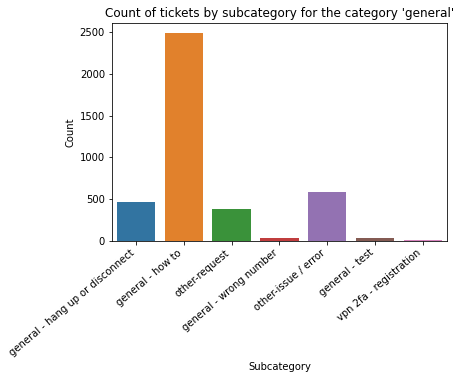

In [ ]:
ax=sns.countplot(data=a_data_general, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'general'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [ ]:
# NEXT: Investigate 'general - how to' by looking at the short_description:
a_data_general_how = a_data.loc[a_data.u_actual_subcategory == 'general - how to']
a_data_general_how.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration
110,152,159,159,I-ACM-SD L1-India,INC1491099,Closed,P4,unable to access adobe- #ac,name : william machusky\r\nemail address : bil...,10-20-2020 09:57:37 - Bhavyashree Suresh (Addi...,NaN,resolved,princeton,2020-10-20 09:57:00,2020-10-27 11:00:00,False,0,183,0,3,Bhavyashree Suresh,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 11:00:00,NaN,2,10/20/2020 10:00,2020-10-20 09:57:00,False,10-20-2020 09:57:37 - bhavyashree suresh (addi...,NaN,los angeles,UNKNOWN,Not Yet Requested,princeton,3 - Low,False,NaN,united states,US-GNUSO6I1-0510/BLDG,nj,northeast(amer),general,general - how to,adobe issues,Security related,True,False,NaN,NaN,NaN,7 days 01:03:00,0:03:03,0:00:00
138,180,191,191,I-ACM-SD L1-India,INC1490984,Closed,P4,google chrome not responding issue,user called in stating that she is having issu...,10-20-2020 08:42:45 - Swathy R (Additional com...,NaN,resolved,coral gables,2020-10-20 08:42:00,2020-10-27 09:00:00,False,0,423,0,3,Swathy R,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 09:00:00,NaN,2,10/20/2020 8:49,2020-10-20 08:42:00,False,10-20-2020 08:42:45 - swathy r (additional com...,NaN,los angeles,UNKNOWN,Not Yet Requested,coral gables,3 - Low,False,NaN,NaN,NaN,fl,southeast(amer),general,general - how to,resolved,Change induced,True,False,NaN,NaN,NaN,7 days 00:18:00,0:07:03,0:00:00
233,278,293,293,I-ACM-SD L1-India,INC1490543,Closed,P4,#ac-unable to access adobe creative cloud,location: usnyc1 - new york city - 605 third a...,10-20-2020 02:16:34 - Kruthi Shetty (Additiona...,NaN,user called in stating that he is not able to...,new york city 3rd ave,2020-10-20 02:16:00,2020-10-27 03:00:00,False,0,234,0,3,Kruthi Shetty,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 03:00:00,NaN,2,10/20/2020 2:20,2020-10-20 02:16:00,False,10-20-2020 02:16:34 - kruthi shetty (additiona...,NaN,los angeles,UNKNOWN,Not Yet Requested,new york city,3 - Low,False,NaN,united states,US-GNUSZ8V1-0605/BLDG,ny,northeast(amer),general,general - how to,#ac-unable to access adobe creative cloud,Security related,True,False,NaN,NaN,NaN,7 days 00:44:00,0:03:54,0:00:00
313,360,379,379,I-ACM-SD L1-India,INC1490034,Closed,P4,projectwise,user called in as he was unable to sign in to ...,10-19-2020 14:52:03 - Saismita Sarangi (Additi...,NaN,resolved,glen allen,2020-10-19 14:52:00,2020-10-26 17:00:00,False,6070,6070,0,3,Saismita Sarangi,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-26 17:00:00,NaN,2,10/19/2020 16:32,2020-10-19 14:52:00,False,10-19-2020 14:52:03 - saismita sarangi (additi...,NaN,los angeles,UNKNOWN,Not Yet Requested,glen allen,3 - Low,False,NaN,us,NaN,va,NaN,general,general - how to,projectwiswe,Change induced,True,False,NaN,NaN,NaN,7 days 02:08:00,1:41:10,1:41:10
319,367,386,386,I-ACM-SD L1-India,INC1490000,Closed,P4,skype,user was facing issue with skype.\r\nuser disc...,NaN,NaN,user was facing issue with skype. user disconn...,other - -,2020-10-19 14:32:00,2020-10-26 15:00:00,False,234,234,0,2,Anupam Khattar,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-26 15:00:00,NaN,2,10/19/2020 14:32,2020-10-19 14:28:00,False,NaN,NaN,los angeles,UNKNOWN,Not Yet Requested,NaN,3 - Low,False,NaN,NaN,OTHER,NaN,NaN,general,general - how to,skype,Knowledge/training related,Tru

In [ ]:
print((a_data_general_how['short_description']))

110                    unable to access adobe- #ac
138             google chrome not responding issue
233      #ac-unable to access adobe creative cloud
313                                    projectwise
319                                          skype
                           ...                    
99273                      domain password reset: 
99278                           temporary password
99280                  advantage request kb0010119
99282                                jabber phone 
99283                                  rdp issue: 
Name: short_description, Length: 2486, dtype: object


In [ ]:
import nltk # Turn the description into tokens
nltk.download('punkt')
from nltk import FreqDist
import re
# Tokenize descriptions for subcategories under the category 'general'
# Create a list that contains the description

#a_data_general_how['short_description'] = a_data_general_how['short_description'].replace("[","")
#a_data_general_how['short_description'] = a_data_general_how['short_description'].replace({"#",""}, regex=True)
#print(a_data_general_how['short_description'])

descriptionlist = a_data_general_how['short_description'].to_list()
#print(descriptionlist)
#print(len(descriptionlist)) #validate all rows were included

descriptionWords = nltk.word_tokenize(str(descriptionlist))
#print(descriptionWords)


# Remove non-alphabetic words
#descriptionWords = [w.replace("[","") for w in descriptionWords] 
#descriptionWords = [w.replace("#","") for w in descriptionWords] 


# Function to remove non-alphabetic words
def alpha_filter(w):
  pattern = re.compile('^[^a-z]+$')   # Regular Expression pattern to match word of non-alphabetical characters
  if (pattern.match(w)):
    return True
  else:
    return False
descriptionWords = [w for w in descriptionWords if not alpha_filter(w)] 

# Remove stop words
nltkstopwords = nltk.corpus.stopwords.words('english')
descriptionWords = [w for w in descriptionWords if not w in nltkstopwords] 
#print(descriptionWords)

# Determine most common words in short_description
descriptionTok = descriptionWords
print()
print('Number of unique words:', len(descriptionTok))
print()
descriptionFD = FreqDist(descriptionTok)
top_words = descriptionFD.most_common(50)


# Print out the most frequent words and it's frequency
for item in top_words:
   print(item[0], '\t', item[1])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

Number of unique words: 10157

access 	 302
'unable 	 279
'user 	 233
issue 	 173
call 	 141
login 	 123
'ghost 	 113
password 	 102
aecom 	 83
reset 	 72
laptop 	 72
vpn 	 69
unable 	 68
connect 	 67
remote 	 66
called 	 65
user 	 65
wanted 	 62
working 	 61
phone 	 59
need 	 58
outlook 	 57
new 	 53
'adobe 	 52
know 	 52
teams 	 52
adobe 	 51
account 	 51
computer 	 50
drive 	 49
request 	 47
license 	 45
able 	 45
information 	 44
log 	 44
email 	 41
walkup 	 40
acrobat 	 40
okta 	 40
files 	 39
'general 	 38
workday 	 38
'information 	 36
'i 	 36
install 	 35
ticket 	 35
file 	 35
network 	 35
help 	 34
software 	 31


In [ ]:
''' Some frequent (valuable) words:
access
login
password
aecom
reset
vpn
remote
user
phone
outlook
teams
adobe
account
acrobat
okta
'''

In [11]:
a_data_software = a_data.loc[a_data.u_actual_category == 'software']
a_data_software['u_actual_subcategory'].value_counts()

software breakfix                  10450
software_other_install              2784
software request - how to           2337
appstore - request/how to            919
software_request_other_update        868
office  365 how to/install           503
office 365 suite - break/fix         503
microsoft teams how to               374
software_other_uninstall             321
software request                     243
microsoft teams breakfix             230
appstore - install failure           217
advantage - how to                   124
office 365 - license activation       58
software_other_previous_version       13
part_of_hsc_deployment_sw              1
Name: u_actual_subcategory, dtype: int64

Text(0, 0.5, 'Count')

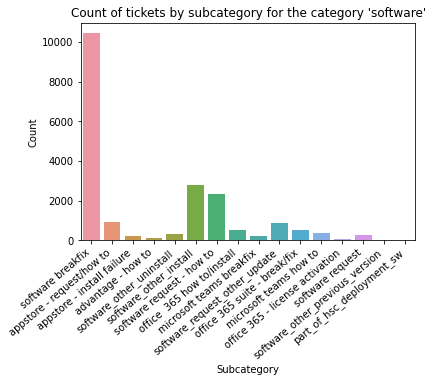

In [12]:
ax=sns.countplot(data=a_data_software, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'software'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [13]:
a_data_access = a_data.loc[a_data.u_actual_category == 'access-issue/request']
a_data_access['u_actual_subcategory'].value_counts()

active directory - password reset                     6639
vpn 2fa - anyconnect how to                           4538
vpn 2fa - registration                                4149
login / password issue                                3343
vpn - certificate                                     3134
okta self pwd registration                            3128
active directory - account locked                     2988
temp admin rights                                     2500
shared folder / net drive - mapping                   1964
active directory - update                             1622
shared folder / net drive - other break / fix         1246
okta verify enrollment/mfa reset                      1142
shared folder / network drive-break / fix             1093
vpn / 2fa-break/fix                                    871
vpn - globalprotect - install/how to/configuration     722
vpn / 2fa-set up                                       666
vpn 2fa - access request                               6

Text(0, 0.5, 'Count')

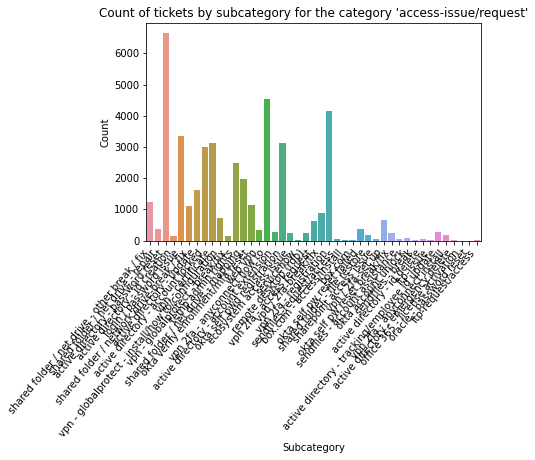

In [17]:
ax=sns.countplot(data=a_data_access, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'access-issue/request'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [ ]:
a_data_security = a_data.loc[a_data.u_actual_category == 'security']
a_data_security['u_actual_subcategory'].value_counts()

encryption-support                        844
security-other issue / error              469
security request - how to                 190
bitlocker - break/fix                      49
virus / malware threat                     36
security - how to                          34
bitlocker - drive recovery key request     34
website access-unblock / whitelist          6
Name: u_actual_subcategory, dtype: int64

Text(0, 0.5, 'Count')

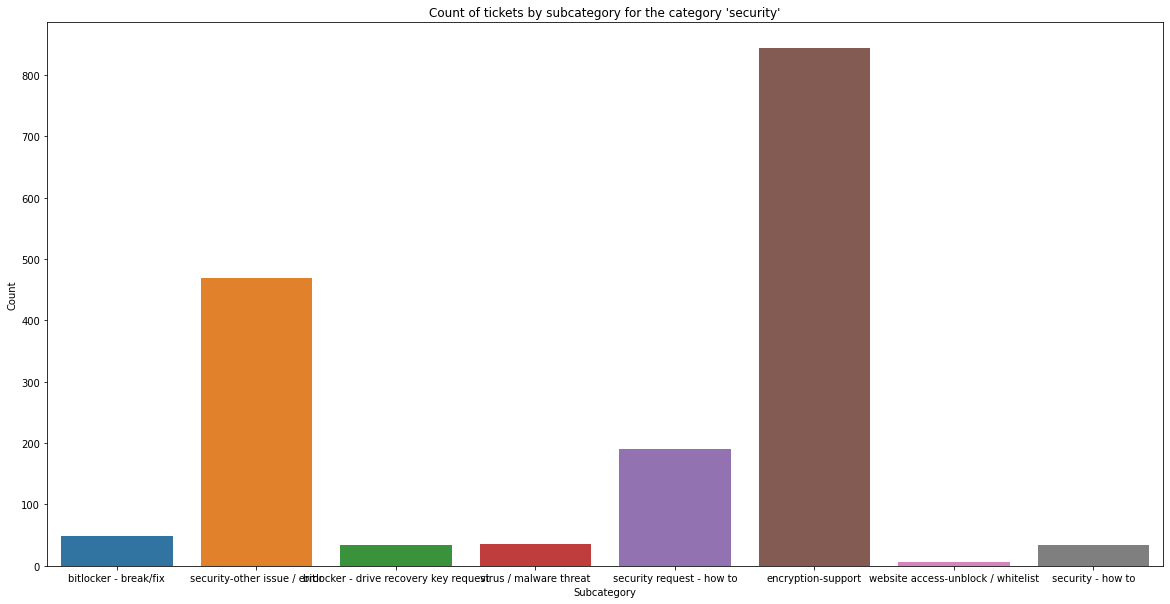

In [ ]:
sns.countplot(data=a_data_security, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'security'")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [ ]:
a_data_email = a_data.loc[a_data.u_actual_category == 'email']
a_data_email['u_actual_subcategory'].value_counts()

email-break / fix                          2121
email - how to                             1351
email - setup                               397
email - configuration                       279
email-access                                163
email-shared mailbox / calendar request      83
email - data folder                          66
email-public folder                          18
email - global address list                  10
email - proofpoint - break/fix                7
email - proofpoint                            1
mobile-break / fix                            1
Name: u_actual_subcategory, dtype: int64

Text(0, 0.5, 'Count')

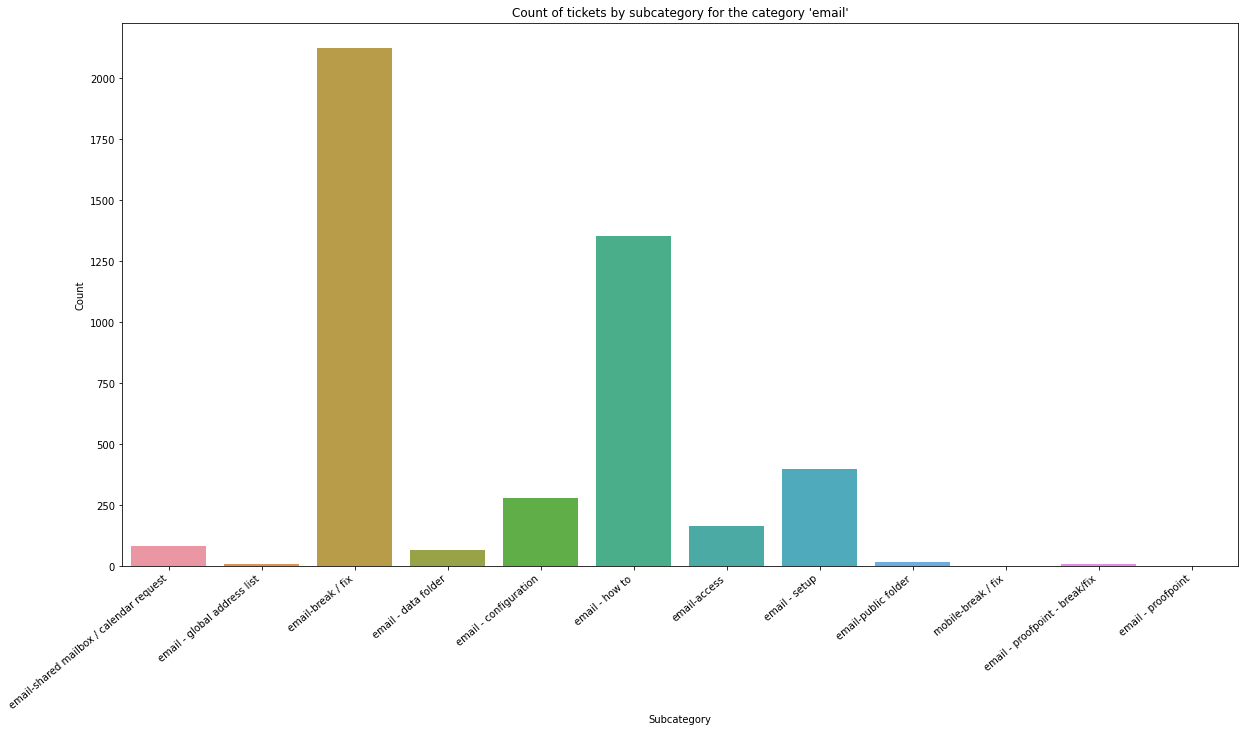

In [ ]:
ax=sns.countplot(data=a_data_email, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'email'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [ ]:
a_data_network = a_data.loc[a_data.u_actual_category == 'network']
a_data_network['u_actual_subcategory'].value_counts()

network - no connectivity              922
wifi - no connectivity                 460
web browser/ internet-break/fix        281
network / wifi - slow performance      252
network/wi-fi - driver installation    153
web_browser _configuration             130
web browser - configuration             56
network - file restore                  24
vpn-error                                3
no network / wifi connectivity           1
Name: u_actual_subcategory, dtype: int64

Text(0, 0.5, 'Count')

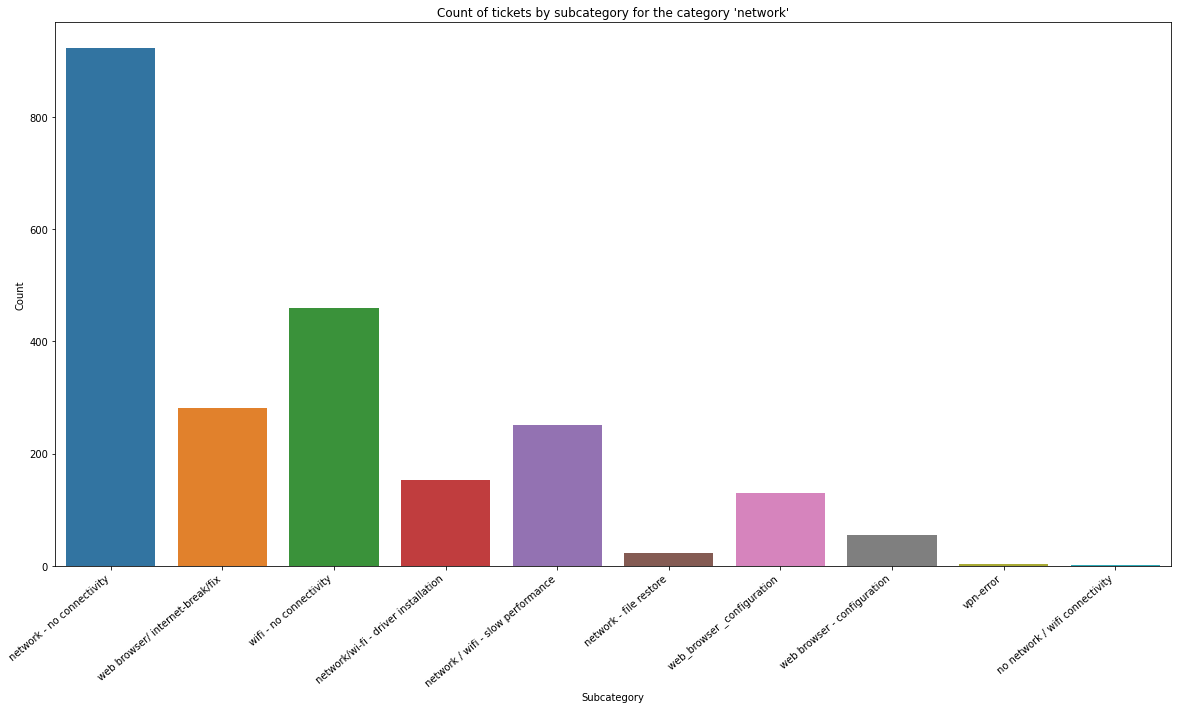

In [ ]:
ax=sns.countplot(data=a_data_network, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'network'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [ ]:
a_data_chat = a_data.loc[a_data.u_actual_category == 'chat']
a_data_chat['u_actual_subcategory'].value_counts()

jabber / skype / lync -  other break / fix    196
jabber / skype / lync - install               100
microsoft teams how to                         38
microsoft teams breakfix                       38
jabber / skype / lync - reinstall              32
skype/lync web app - configuration             28
jabber/skype/lync web app - configuration      25
Name: u_actual_subcategory, dtype: int64

Text(0, 0.5, 'Count')

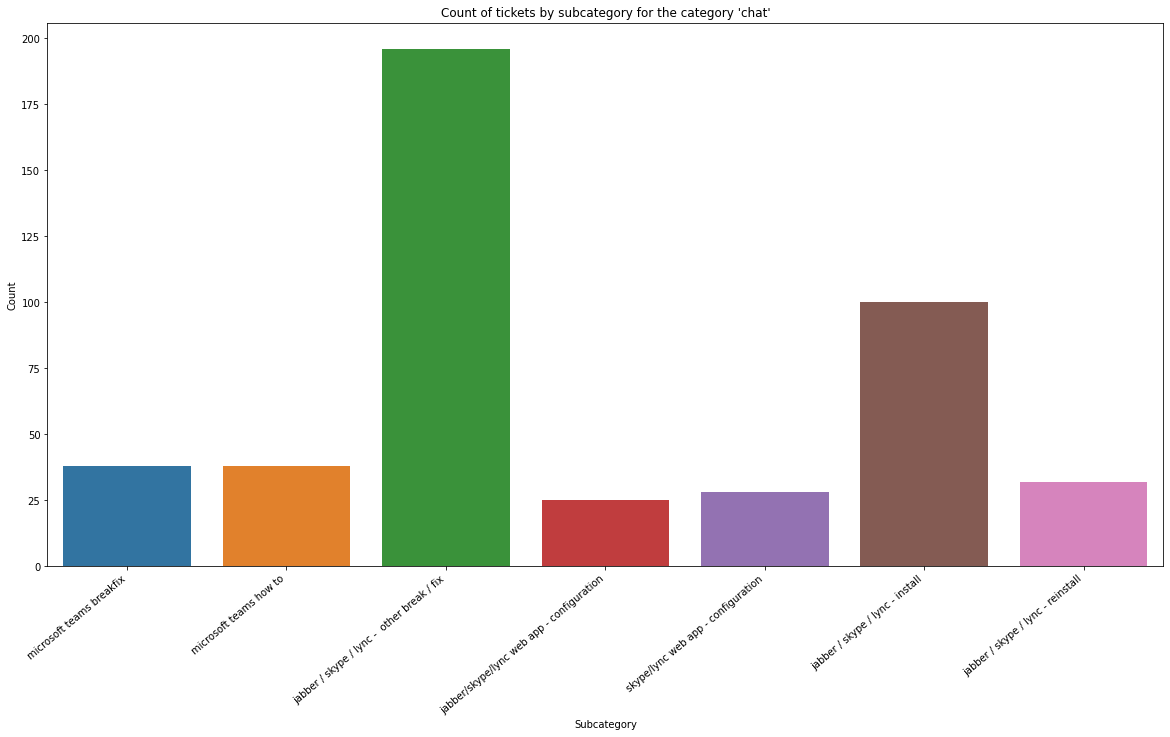

In [ ]:
ax=sns.countplot(data=a_data_chat, x='u_actual_subcategory')
plt.title("Count of tickets by subcategory for the category 'chat'")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Subcategory')
plt.ylabel('Count')

# COMPANY J - EDA

In [ ]:
# COMPANY J
# Read in data:

j_data = pd.read_csv('/content/gdrive/Shared drives/IST 718 Project/j_cleaned.csv')
j_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,7,9,10,12,14,17,18,19,24,28,29,30,32,34,35,37,38,39,41,42,44,52,53,54,55,56,57,58,59,64,66,67,68,69,71,72,73,74,75,76,77,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
0,0,INC3148753,2020-06-09 20:46:00,Closed,system,Desktop or laptop,\tI have opened laptop refresh for more than 1...,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-10 18:45:00,Accepted Resolution,0.0,pthakur,0.0,2020-06-10 15:45:00,6.0,onsite-americas,itco,P3,False,2,6,2020-06-22 03:02:00,0,2020-06-11 17:26:00,Incident,Closed,Closed Complete,3 - Low,P3,False,81659.0,False,Yes,Do not notify,False,True,"Jun 22, 2020 00:02:12 system: Incident automat...",P3,2020-06-10 15:45:00,...,False,global,2020-06-24 05:03:00,neelamvijay,2020-06-09 20:46:00,Self-service,False,False,False,False,False,False,False,Resolved,713708,6/15/2020 18:45,False,ttruong,other,1,NaN,NaN,NaN,NaN,2020-06-22 03:02:00,NaN,NaN,NaN,1 days 20:40:00,NaN,NaN,NaN,2:59:54,2:59:54,18:58:54,22:40:59,0:00:00,"12 days, 6:15:17","8 days, 6:15:08",2020-06-22 00:02:12
1,1,INC2960955,2020-02-04 07:46:00,Closed,system,Easy connect,I can't seem to connect via Pulse anymore with...,"Westford, MA",ONSITE-AMERICAS,2020-02-04 09:55:00,Accepted Resolution,0.0,talmquist,0.0,2020-02-04 07:47:00,6.0,onsite-americas,onsite-americas,P3,False,2,4,2020-02-15 03:03:00,0,2020-02-04 14:18:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Feb 15, 2020 00:03:26 system: Incident automat...",P3,2020-02-04 07:47:00,...,False,global,2020-02-19 13:28:00,talmquist,2020-02-04 07:47:00,Incident Form,False,False,False,False,False,False,False,Resolved,735188,UNKNOWN,False,ccoffee,report an issue,0,NaN,NaN,NaN,NaN,2020-02-15 03:03:00,NaN,NaN,NaN,0 days 06:32:00,NaN,NaN,NaN,6:30:39,2:07:36,0:00:00,0:00:00,0:00:00,"10 days, 19:16:42","8 days, 12:13:08",2020-02-15 00:03:26
2,2,INC3131802,2020-05-27 11:06:00,Closed,system,Desktop or laptop,""" i"" key not working : virtual keyboard works...","Houston, TX",ONSITE-AMERICAS,2020-05-27 12:43:00,Accepted Resolution,0.0,pthakur,0.0,2020-05-27 12:27:00,4.0,onsite-americas,onsite-americas,P3,False,2,6,2020-06-07 03:02:00,2,2020-06-07 03:02:00,Incident,Closed,Closed Complete,3 - Low,P3,True,915534.0,False,Yes,Do not notify,False,True,"Jun 07, 2020 00:02:12 system: Incident automat...",P3,2020-05-27 12:27:00,...,False,global,2020-06-10 18:23:00,pthakur,2020-05-27 12:27:00,Incident Form,False,False,False,False,False,False,False,Cancelled,636783,6/6/2020 12:43,False,tdefranco,desktop / laptop hardware issue,0,NaN,NaN,NaN,NaN,2020-06-07 03:02:00,NaN,NaN,NaN,10 days 15:56:00,NaN,NaN,NaN,0:16:05,0:16:05,0:00:00,"10 days, 14:18:54",0:00:00,"10 days, 15:55:21","7 days, 8:53:03",2020-06-07 00:02:12
3,3,INC3245966,2020-09-07 03:46:00,Closed,system,Desktop or laptop,add Dell 7010 and Lenovo M910 image to the SCC...,"Taikoo Shing,

In [ ]:
# Import packages for analysis
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
j_data = j_data.dropna(axis=0, subset=['subcategory'])
# j_data.isnull().sum()
j_data.head()
#print(j_data.info())

,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
0,0,INC3148753,2020-06-09 20:46:00,Closed,system,Desktop or laptop,\tI have opened laptop refresh for more than 1...,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-10 18:45:00,Accepted Resolution,0.0,pthakur,0.0,2020-06-10 15:45:00,6.0,onsite-americas,itco,P3,False,2,6,2020-06-22 03:02:00,0,2020-06-11 17:26:00,Incident,Closed,Closed Complete,3 - Low,P3,False,81659.0,False,Yes,Do not notify,False,True,"Jun 22, 2020 00:02:12 system: Incident automat...",P3,2020-06-10 15:45:00,...,False,global,2020-06-24 05:03:00,neelamvijay,2020-06-09 20:46:00,Self-service,False,False,False,False,False,False,False,Resolved,713708,6/15/2020 18:45,False,ttruong,other,1,NaN,NaN,NaN,NaN,2020-06-22 03:02:00,NaN,NaN,NaN,1 days 20:40:00,NaN,NaN,NaN,2:59:54,2:59:54,18:58:54,22:40:59,0:00:00,"12 days, 6:15:17","8 days, 6:15:08",2020-06-22 00:02:12
1,1,INC2960955,2020-02-04 07:46:00,Closed,system,Easy connect,I can't seem to connect via Pulse anymore with...,"Westford, MA",ONSITE-AMERICAS,2020-02-04 09:55:00,Accepted Resolution,0.0,talmquist,0.0,2020-02-04 07:47:00,6.0,onsite-americas,onsite-americas,P3,False,2,4,2020-02-15 03:03:00,0,2020-02-04 14:18:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Feb 15, 2020 00:03:26 system: Incident automat...",P3,2020-02-04 07:47:00,...,False,global,2020-02-19 13:28:00,talmquist,2020-02-04 07:47:00,Incident Form,False,False,False,False,False,False,False,Resolved,735188,UNKNOWN,False,ccoffee,report an issue,0,NaN,NaN,NaN,NaN,2020-02-15 03:03:00,NaN,NaN,NaN,0 days 06:32:00,NaN,NaN,NaN,6:30:39,2:07:36,0:00:00,0:00:00,0:00:00,"10 days, 19:16:42","8 days, 12:13:08",2020-02-15 00:03:26
2,2,INC3131802,2020-05-27 11:06:00,Closed,system,Desktop or laptop,""" i"" key not working : virtual keyboard works...","Houston, TX",ONSITE-AMERICAS,2020-05-27 12:43:00,Accepted Resolution,0.0,pthakur,0.0,2020-05-27 12:27:00,4.0,onsite-americas,onsite-americas,P3,False,2,6,2020-06-07 03:02:00,2,2020-06-07 03:02:00,Incident,Closed,Closed Complete,3 - Low,P3,True,915534.0,False,Yes,Do not notify,False,True,"Jun 07, 2020 00:02:12 system: Incident automat...",P3,2020-05-27 12:27:00,...,False,global,2020-06-10 18:23:00,pthakur,2020-05-27 12:27:00,Incident Form,False,False,False,False,False,False,False,Cancelled,636783,6/6/2020 12:43,False,tdefranco,desktop / laptop hardware issue,0,NaN,NaN,NaN,NaN,2020-06-07 03:02:00,NaN,NaN,NaN,10 days 15:56:00,NaN,NaN,NaN,0:16:05,0:16:05,0:00:00,"10 days, 14:18:54",0:00:00,"10 days, 15:55:21","7 days, 8:53:03",2020-06-07 00:02:12
3,3,INC3245966,2020-09-07 03:46:00,Closed,system,Desktop or laptop,add Dell 7010 and Lenovo M910 image to the SCC...,"Taikoo Shing,

In [ ]:
j_data['category'].value_counts()

Desktop or laptop                        3476
Access and passwords                     2166
Application support                      2039
Infrastructure services                   577
Printers and peripherals                  474
Mobility devices and services             454
Easy connect                              310
Software                                  257
Email / Calendar                          109
Telephone & Conference (Audio, Video)      78
Collaboration and content tools            64
Microsoft Skype services                   27
ININ (Contact Center service)               7
Infrastructure Monitoring                   5
Customer Success Business Management        2
Engineering                                 2
Finance                                     1
Name: category, dtype: int64

In [ ]:
j_data_software = j_data.loc[j_data.category == 'Software']
j_data_software.head()

,Unnamed: 0,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,u_last_assignment_time,...,knowledge,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime
38,38,INC2980510,2020-02-21 18:01:00,Closed,system,Software,Software: SecureFX for Windows,"Westford, MA",IT-INFRA-CTG,2020-02-24 14:53:00,Accepted Resolution,0.0,ananyag,0.0,2020-02-22 03:44:00,6.0,it-infra-ctg,itco,P3,False,2,6,2020-03-06 03:03:00,1,2020-02-24 14:53:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Mar 06, 2020 00:03:09 system: Incident automat...",P3,2020-02-22 03:44:00,...,False,global,2020-03-10 06:10:00,achung,2020-02-21 18:01:00,Self-service,False,False,False,False,False,False,False,Resolved,810108,UNKNOWN,False,jeyaprakashj,windows,1,NaN,NaN,NaN,NaN,2020-03-06 03:03:00,NaN,NaN,NaN,2 days 20:52:00,NaN,NaN,NaN,"2 days, 11:09:25","2 days, 11:09:25",9:43:19,0:00:00,0:00:00,"13 days, 9:01:58","9 days, 9:01:48",2020-03-06 00:03:09
103,103,INC3227580,2020-08-19 12:39:00,Closed,spgarg,Software,365 update not loading,"Herndon, VA",IT-INFRA-CTG,2020-08-20 07:23:00,Accepted Resolution,0.0,yhm,0.0,2020-08-19 16:17:00,7.0,it-infra-ctg,itco,P3,False,2,9,2020-08-20 08:24:00,0,2020-08-20 08:17:00,Incident,Closed,Closed Complete,3 - Low,P3,False,3231.0,False,Yes,Do not notify,False,True,"Aug 20, 2020 08:24:46 spgarg: email reply from...",P3,2020-08-19 16:17:00,...,False,global,2020-08-25 04:01:00,spgarg,2020-08-19 12:39:00,Self-service,False,False,False,False,False,False,False,Resolved,71119,8/25/2020 7:23,False,jeyaprakashj,windows,1,NaN,NaN,NaN,NaN,2020-08-20 08:24:00,NaN,NaN,NaN,0 days 19:38:00,NaN,NaN,NaN,15:06:28,15:06:28,3:37:39,0:53:51,0:00:00,19:45:20,19:45:19,2020-08-20 08:24:46
359,359,INC2977991,2020-02-19 19:57:00,Closed,system,Software,Acrobat DC installation request,"Westford, MA",ONSITE-AMERICAS,2020-02-19 20:09:00,Accepted Resolution,0.0,howardng,0.0,2020-02-19 20:09:00,6.0,onsite-americas,onsite-americas,P4,False,2,3,2020-03-02 03:02:00,0,2020-02-20 12:01:00,Incident,Closed,Closed Complete,3 - Low,P4,False,0.0,False,Yes,Do not notify,False,True,"Mar 02, 2020 00:02:48 system: Incident automat...",P4,2020-02-19 20:09:00,...,False,global,2020-02-28 19:58:00,howardng,2020-02-19 20:09:00,Incident Form,False,False,False,False,False,False,False,Resolved,630328,UNKNOWN,False,howardng,windows,0,NaN,NaN,NaN,NaN,2020-03-02 03:02:00,NaN,NaN,NaN,0 days 16:04:00,NaN,NaN,NaN,15:52:53,0:00:00,0:00:00,0:00:00,0:00:00,"11 days, 7:05:36","7 days, 7:05:28",2020-03-02 00:02:48
417,417,INC2972974,2020-02-14 19:12:00,Closed,avalencia,Software,Adobe Acrobat DC installation on a refresh laptop,"Sunnyvale, CA",IT-INFRA-CTG,2020-02-14 19:40:00,Accepted Resolution,0.0,howardng,0.0,2020-02-14 19:20:00,6.0,it-infra-ctg,it-infra-ctg,P3,False,2,9,2020-02-20 15:09:00,0,2020-02-1

In [ ]:
j_data_software['subcategory'].value_counts()

windows                   184
macintosh                  70
other operating system      3
Name: subcategory, dtype: int64

Text(0, 0.5, 'Count')

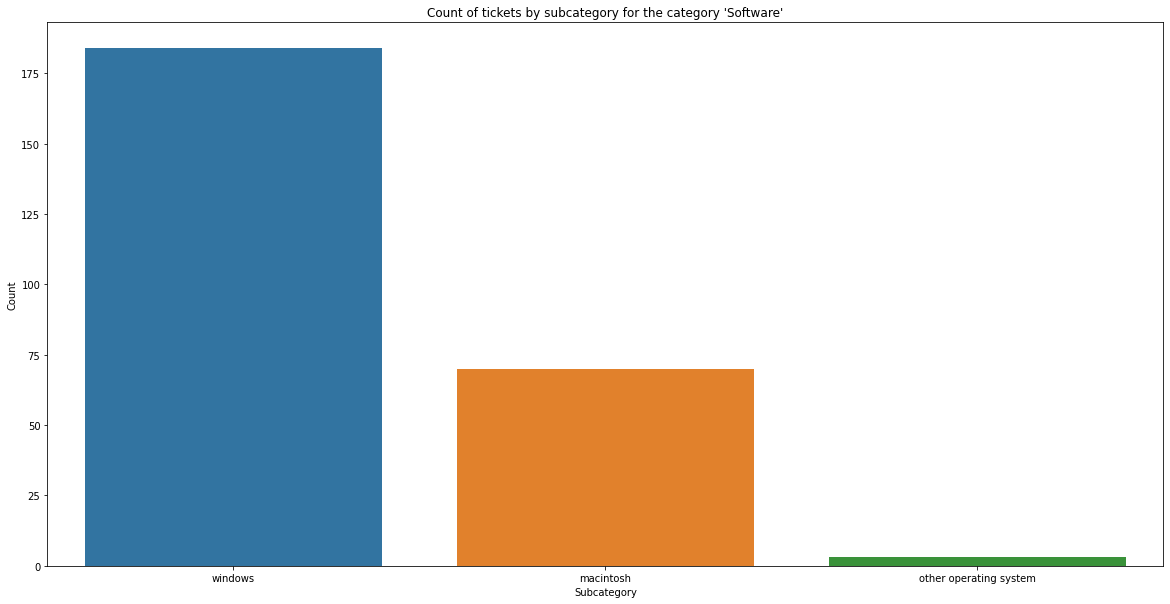

In [ ]:
sns.countplot(data=j_data_software, x='subcategory')
plt.title("Count of tickets by subcategory for the category 'Software'")
plt.xlabel('Subcategory')
plt.ylabel('Count')

In [ ]:
# Inventory consists of only 10% Windows in their environment though we see the majority of software tickets are Windows (significantlly higher)